#**Diabetes Prediction using ML**



This project uses the Pima Indians Diabetes Dataset to build and compare two supervised learning models — **Logistic Regression** and **Linear Discriminant Analysis (LDA)** for predicting the likelihood of diabetes based on medical diagnostic features.

**Overview**

This project applies classic supervised learning classifiers to a real-world health problem using
the Pima Indians Diabetes Database. It focuses on model building, evaluation, and interpretation
to compare Logistic Regression and Linear Discriminant Analysis (LDA) for predicting the onset
of diabetes.

**Problem Statement**

Early detection of diabetes is crucial for patient health management. Medical diagnostic data
contains complex patterns that can indicate a patient's risk. This project aims to develop and
compare two supervised learning models, Logistic Regression and Linear Discriminant
Analysis (LDA), to accurately predict whether a patient has diabetes based on this diagnostic
data.

##**IMPORTS**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc, classification_report,
    roc_curve, roc_auc_score
)

from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/diabetes.csv'
df = pd.read_csv(file_path)

df.head()


Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##**Dataset Description**

In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

df.describe()


Shape of dataset: (768, 9)

Column names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##**Exploratory Data Analysis(EDA)**

In [4]:
zero_counts = (df == 0).sum()
print("Zero value counts per column:\n")
print(zero_counts)

Zero value counts per column:

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


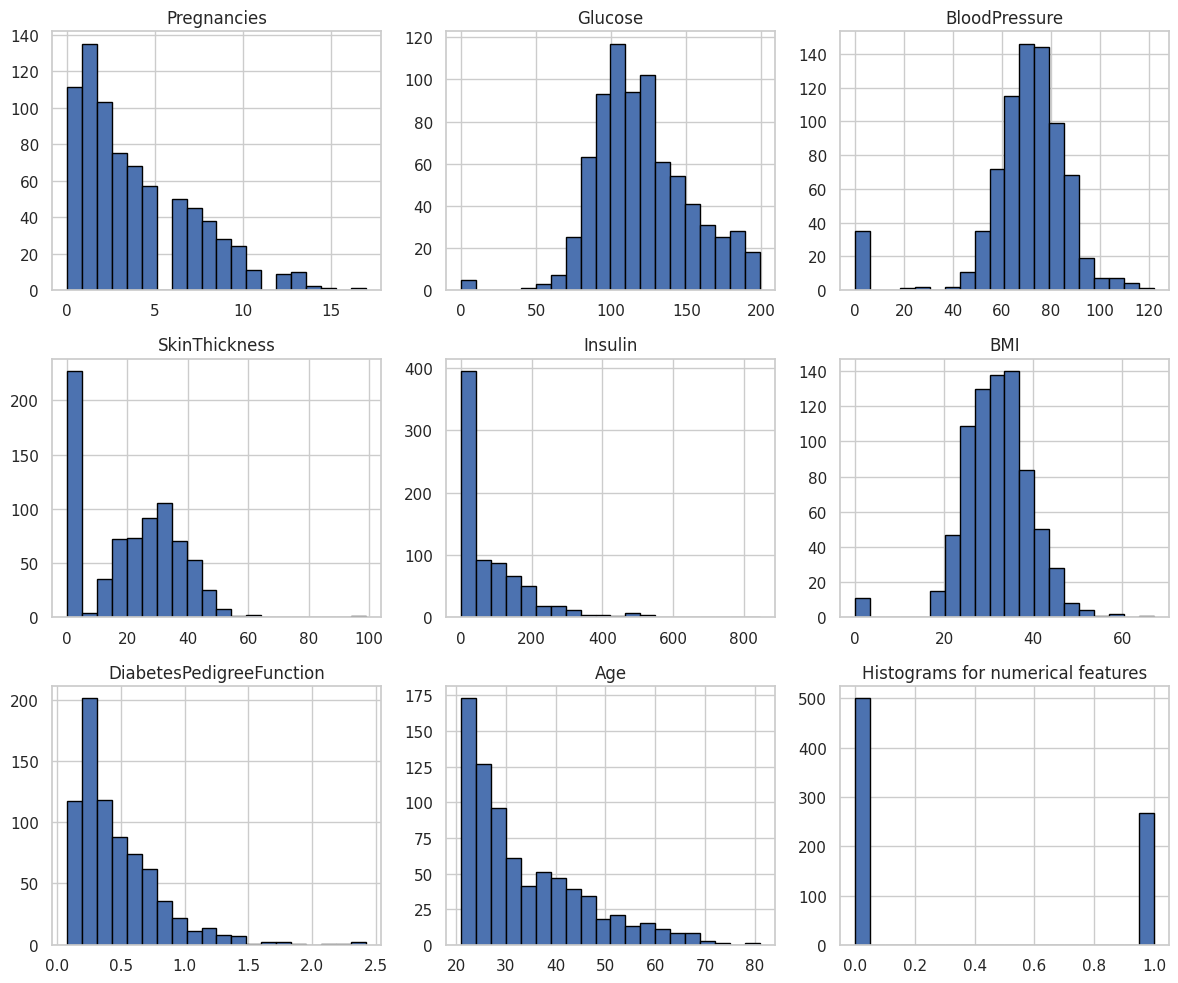

In [5]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.title('Histograms for numerical features')
plt.tight_layout()
plt.show()

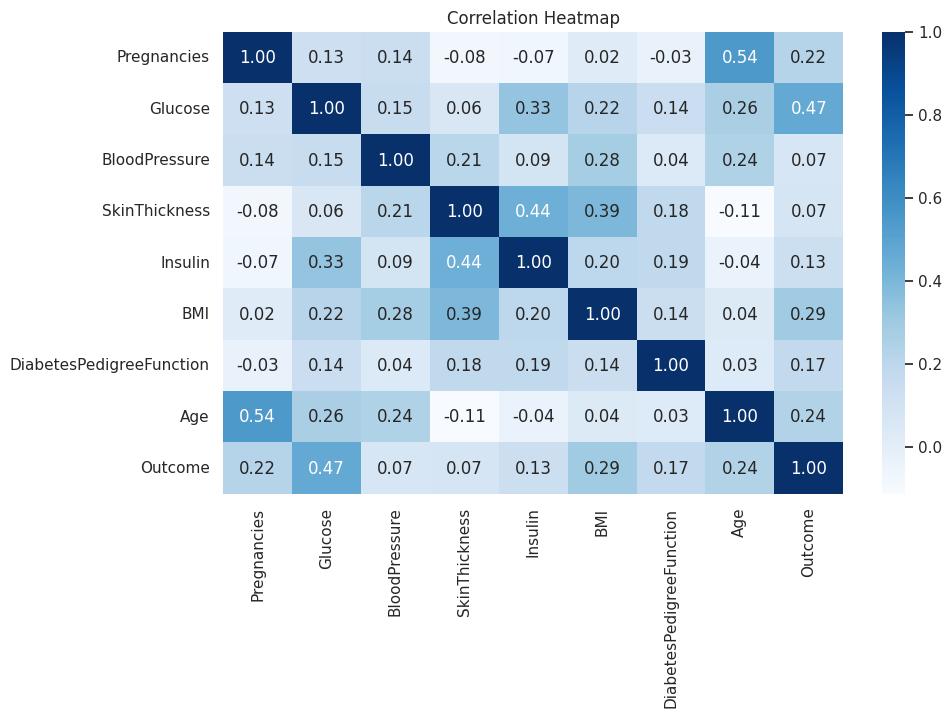

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

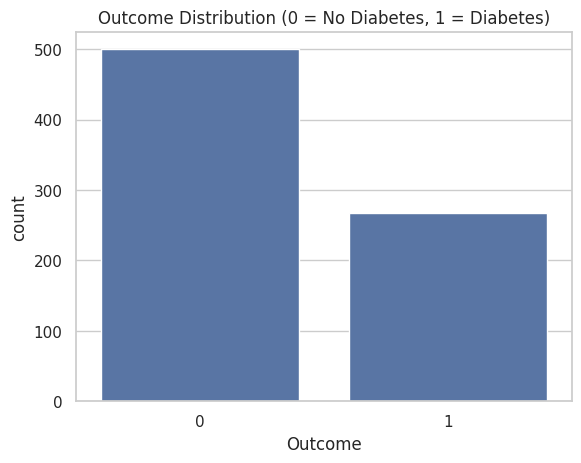

In [7]:
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.show()

##**Data Cleaning and Preprocessing**

In [8]:
# Fixing columns that should not have 0 values by replacing them with the median values
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero_invalid:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

print("Zero value counts AFTER cleaning:\n")
print((df == 0).sum())

Zero value counts AFTER cleaning:

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [9]:
#Train test split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("\nTraining set shape :", X_train.shape)
print("Testing set shape  :", X_test.shape)


Training set shape : (614, 8)
Testing set shape  : (154, 8)


In [10]:
#Scaled version for Logistic regression only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##**ML Models**

Accuracy: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Confusion Matrix:


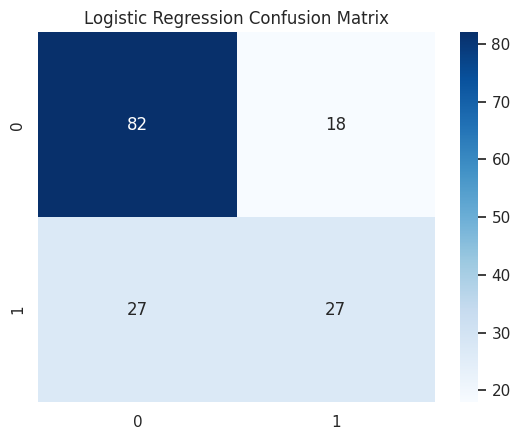

In [11]:
#Logistic Regression Model
lr = LogisticRegression(max_iter=2000, C=0.8)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154


Confusion Matrix:


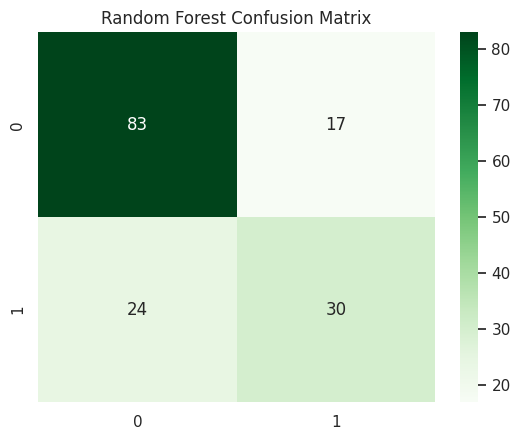

In [12]:
#Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [17]:
!pip install xgboost --quiet

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:41:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.61      0.63      0.62        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154


Confusion Matrix:


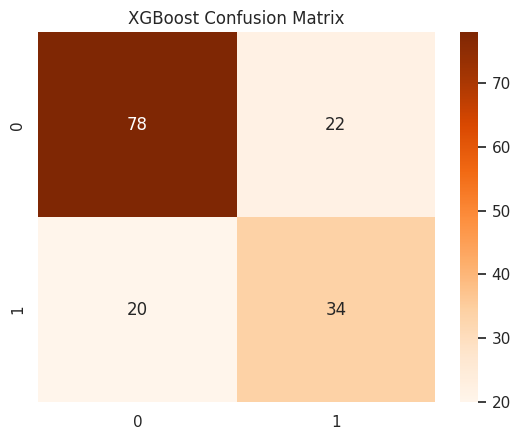

In [19]:
#XGBoost Classifier
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=0.1,
    reg_lambda=2,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.show()

##**ROC Curves and AUC**

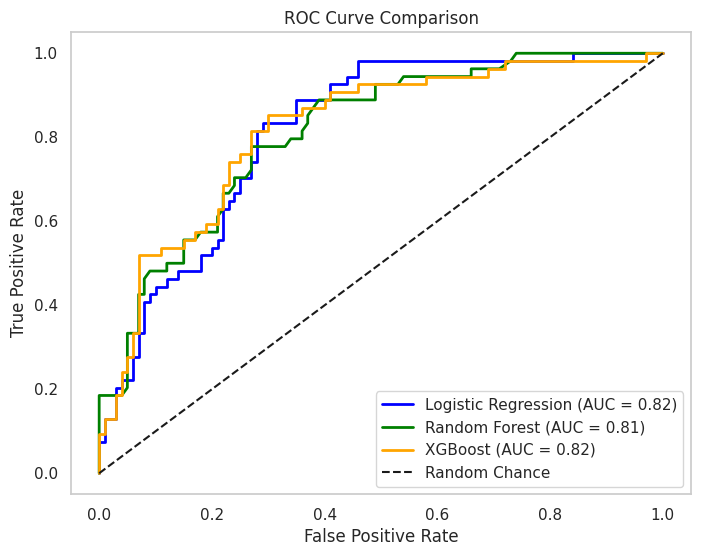

In [20]:
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='orange', linewidth=2)
plt.plot([0,1], [0,1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


##**Feature importance Analysis**

Logistic Regression Feature Coefficients:
                    Feature  Coefficient
1                   Glucose     1.203389
5                       BMI     0.697304
0               Pregnancies     0.374138
6  DiabetesPedigreeFunction     0.244124
7                       Age     0.138313
3             SkinThickness     0.030208
2             BloodPressure    -0.052219
4                   Insulin    -0.130901


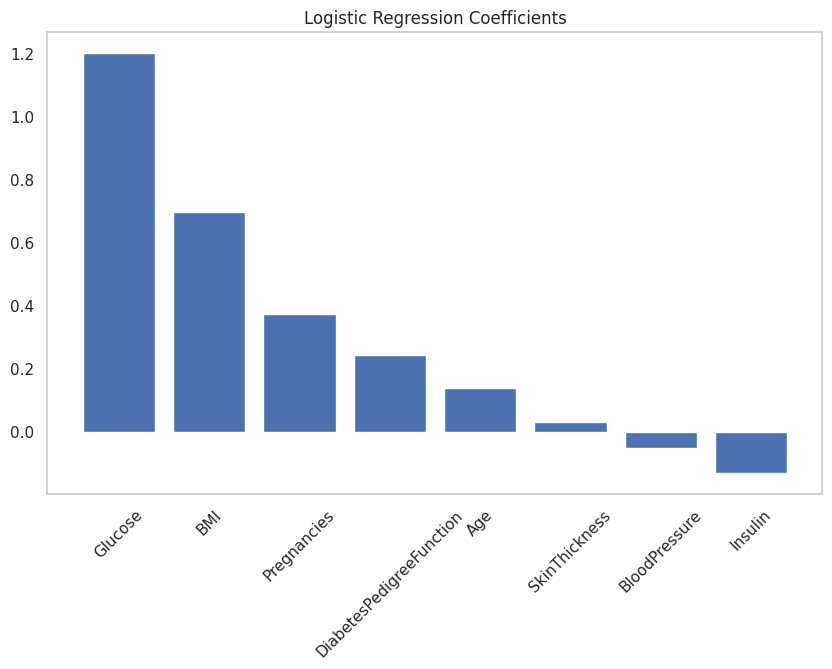

In [29]:
#Logistic Regression
lr_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Logistic Regression Feature Coefficients:")
print(lr_coef)

plt.figure(figsize=(10,6))
plt.bar(lr_coef['Feature'], lr_coef['Coefficient'])
plt.xticks(rotation=45)
plt.title("Logistic Regression Coefficients")
plt.grid()
plt.show()


Random Forest Feature Importance:
                    Feature  Importance
1                   Glucose    0.267832
5                       BMI    0.161062
7                       Age    0.128884
6  DiabetesPedigreeFunction    0.123144
2             BloodPressure    0.087681
0               Pregnancies    0.083216
4                   Insulin    0.074798
3             SkinThickness    0.073383


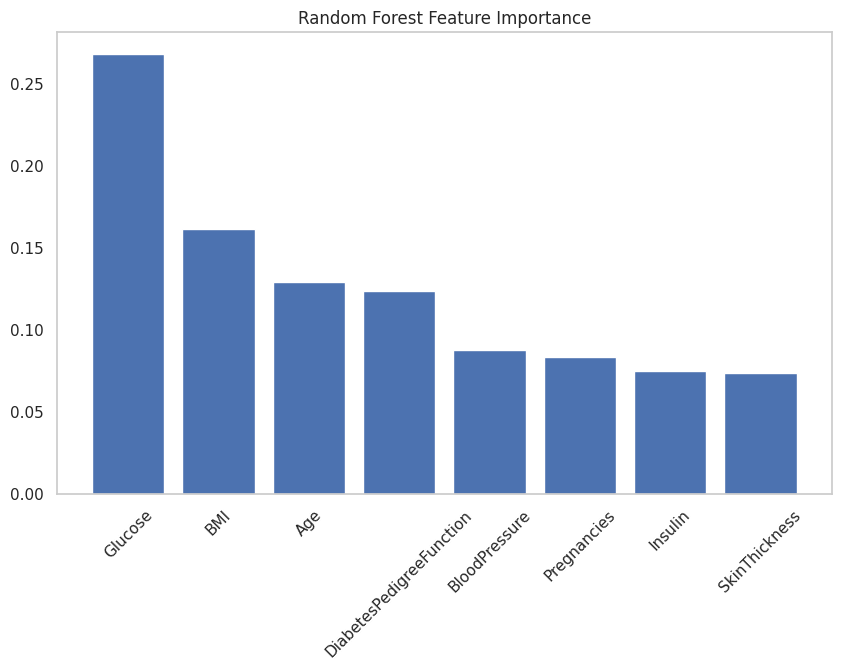

In [30]:
#Random Forest Classifier
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_importance)

plt.figure(figsize=(10,6))
plt.bar(rf_importance['Feature'], rf_importance['Importance'])
plt.xticks(rotation=45)
plt.title("Random Forest Feature Importance")
plt.grid()
plt.show()


XGBoost Feature Importance:
                    Feature  Importance
1                   Glucose    0.283530
5                       BMI    0.147768
7                       Age    0.132620
6  DiabetesPedigreeFunction    0.096566
0               Pregnancies    0.096471
4                   Insulin    0.088524
2             BloodPressure    0.081711
3             SkinThickness    0.072811


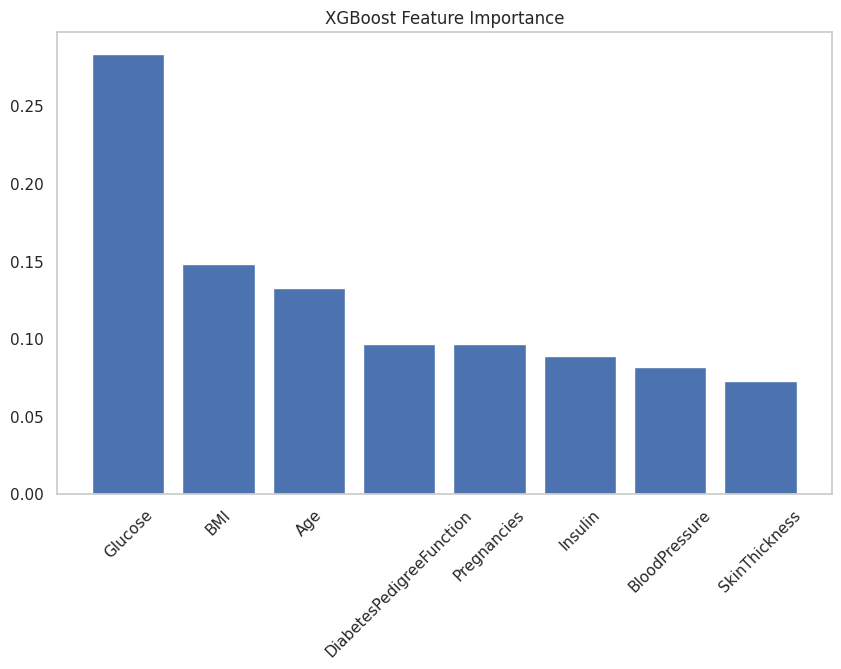

In [31]:
#XGBoost
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(xgb_importance)

plt.figure(figsize=(10,6))
plt.bar(xgb_importance['Feature'], xgb_importance['Importance'])
plt.xticks(rotation=45)
plt.title("XGBoost Feature Importance")
plt.grid()
plt.show()